Some code to study the overall RFI stats generated from Jiapeng Zhang's RFI flagging work. It plots the % of times a given frequency bin is flagged, as well as the overall % of band masked for a chosen occurance threshold.

In [1]:
import csv
import matplotlib as mpl
import pylab as plt
import numpy as np

In [4]:
#Read the csv file
rows = []
with open('RFI_for_UHF.csv', newline='') as csvfile:
    UHF = csv.reader(csvfile, delimiter=',')
    next(UHF)
    for row in UHF:
        row[2] = row[2].replace("\n", "")
        rows.append(row)

In [5]:
#UHF range
Freq_Bins = np.arange(544,1088,1)  #Counting no. of rfi flags every 1 MHz
Occ_Counts = np.zeros(len(Freq_Bins))


In [6]:
BW_total = Freq_Bins[-1]-Freq_Bins[0]
print(BW_total)

543


In [7]:
#Loop through each line (filename), use the histogram function to count the number of flagged freq that falls under each Freq_bin

for i in range(len(rows)):
    filename = rows[i][1]
    tmp = rows[i][2].replace("[", "").replace("]", "").split()
    x = np.array(tmp)
    RFI = x.astype(np.float)
    histo=np.histogram(RFI,bins=np.append(Freq_Bins,Freq_Bins[-1]+1))
    Occ_Counts = Occ_Counts + histo[0]

<ipython-input-7-9a00dd74e1bd>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RFI = x.astype(np.float)


In [19]:
#Figure out % of band flagged for a given threshold
Threshold_Bins = np.arange(0,np.max(Occ_Counts),1)
histo=np.histogram(Occ_Counts,bins=np.append(Threshold_Bins,Threshold_Bins[-1]+1))

#Use the cumulative sum function to find out the % of band masked. need to flip the array so the sum is correct
Percent_band = histo[0]
Percent_band = np.cumsum(np.flip(Percent_band))

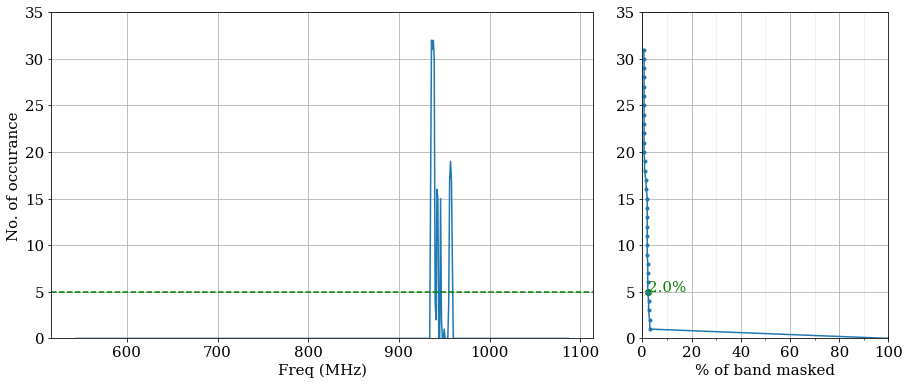

In [21]:
fig = plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace = 0.2)
mpl.rcParams.update({'font.size': 15,'font.family': 'serif'})



ax = plt.subplot2grid((1,3),(0,0), rowspan=1,colspan=2)
ax.plot(Freq_Bins,Occ_Counts)
ax.set_ylabel("No. of occurance")
ax.set_xlabel("Freq (MHz)")
ax.grid()
ax.set_ylim(0,35)
ax.axhline(y=5,c="g",label="Proposed cut",ls="--")


x = np.flip(Percent_band)/BW_total*100
ax2 = plt.subplot2grid((1,3),(0,2), rowspan=1,colspan=1)
ax2.plot(x,Threshold_Bins,marker="o",markersize=3)
ax2.grid()
ax2.set_xlabel("% of band masked")
ax2.set_xlim(0,100)
ax2.set_ylim(0,35)
minor_ticks = np.arange(0, 100, 10)
ax2.set_xticks(minor_ticks, minor=True)

ID=5
ax2.grid(b=True, which='minor', color='gainsboro', linestyle='-',alpha=0.5)
ax2.annotate(str(np.round(x[ID],0))+"%",(x[ID],Threshold_Bins[ID]),c="g")
ax2.scatter(x[ID],Threshold_Bins[ID],marker="o",c="g")




A total of 13 observations were included in this UHF study. All of them have the complete freq coverage between 544-1088MHz. Hence there is no need to do additional normalization here (as was the case for the L-band analysis).

In [22]:
#Print out the master list of RFI to mask

MasterRFI = []
for i in range(len(Freq_Bins)):
    if Occ_Counts[i]>=5:
        MasterRFI.append(Freq_Bins[i])
        
print(MasterRFI)


[935, 936, 937, 938, 939, 942, 943, 946, 956, 957, 958, 959]
